## Семинар 9: Линейные модели (Linear models)

<a href="https://colab.research.google.com/github/SergeyMalashenko/MachineLearning_Summer_2023/blob/main/seminars/8/seminar_8.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [1]:
from scipy.io import loadmat
from io import BytesIO
import requests

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn         import linear_model

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import numpy   as np
import scipy   as sp

In [2]:
from sklearn import set_config
set_config(transform_output = "pandas")

### Набор данных

Real Estate Dataset (Набор данных о продаже объектов недвижимости)

Набор данных состоит из 414 наблюдений и 7 числовых признаков, которые выглядят следующим образом:



| Признак                                    | Описание                              |
|--------------------------------------------|---------------------------------------|
| X1 transaction date                        | Дата сделки                           |
| X2 house age                               | Возраст дома                          |
| X3 distance to the nearest MRT station     | Расстояние до ближайшей станции метро |
| X4 number of convenience stores            | количество круглосуточных магазинов   |
| X5 latitude                                | Широта                                |
| X6 longitude                               | Долгота                               |
| Y house price of unit area                 | Стоимость за квадратный метр          |




In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import Normalizer

#path = "data/prostate.csv"
path = "data/real_estate.csv"
X = pd.read_csv(path, index_col='No')
#standartize data
#scaler = Normalizer()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = X.pop('Y house price of unit area')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
2,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
3,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
5,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
dtypes: float64(6)
memory usage: 22.6 KB


In [5]:
X.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,3.705506e-13,-9.225042e-17,-1.265762e-16,-7.508755e-18,1.343166e-13,-1.614537e-12
std,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00
min,-1.711384e+00,-1.556639e+00,-8.412787e-01,-1.391638e+00,-2.981805e+00,-3.903223e+00
25%,-8.236832e-01,-7.634921e-01,-6.303115e-01,-1.051734e+00,-4.864845e-01,-3.441981e-01
50%,6.401736e-02,-1.417172e-01,-4.693493e-01,-3.202000e-02,1.669943e-01,3.437301e-01
75%,9.517179e-01,9.172774e-01,2.938267e-01,6.477891e-01,6.796928e-01,6.487148e-01
max,1.541151e+00,2.292652e+00,4.287008e+00,2.007407e+00,3.675611e+00,2.146891e+00


### Визуализация данных

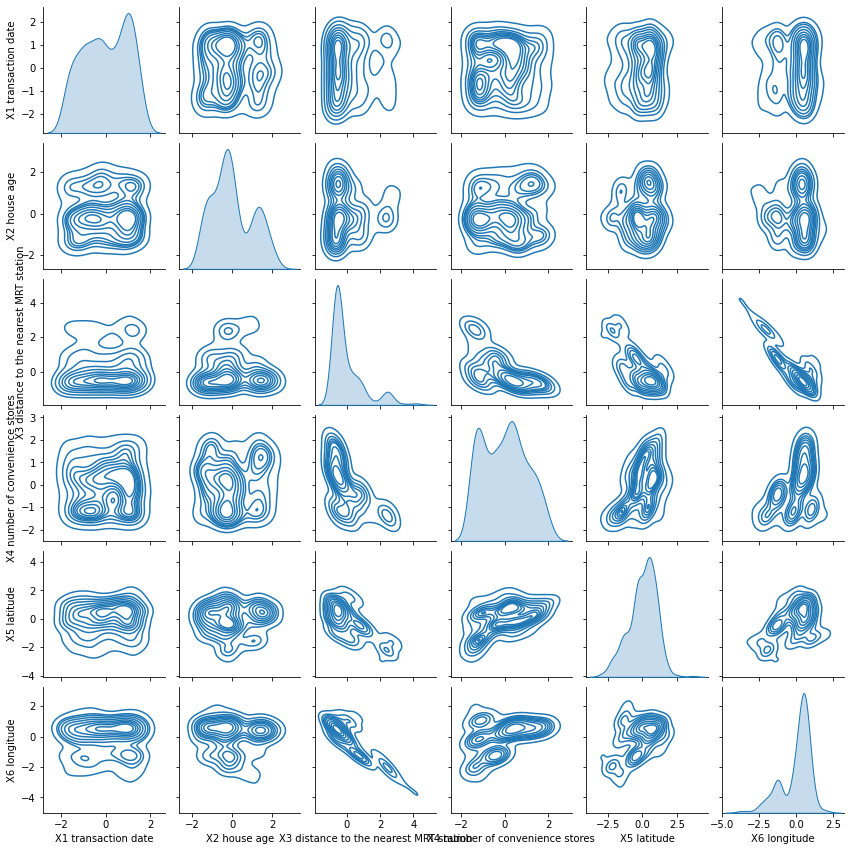

In [6]:
sns.pairplot(X, height=2, kind="kde");

<AxesSubplot:>

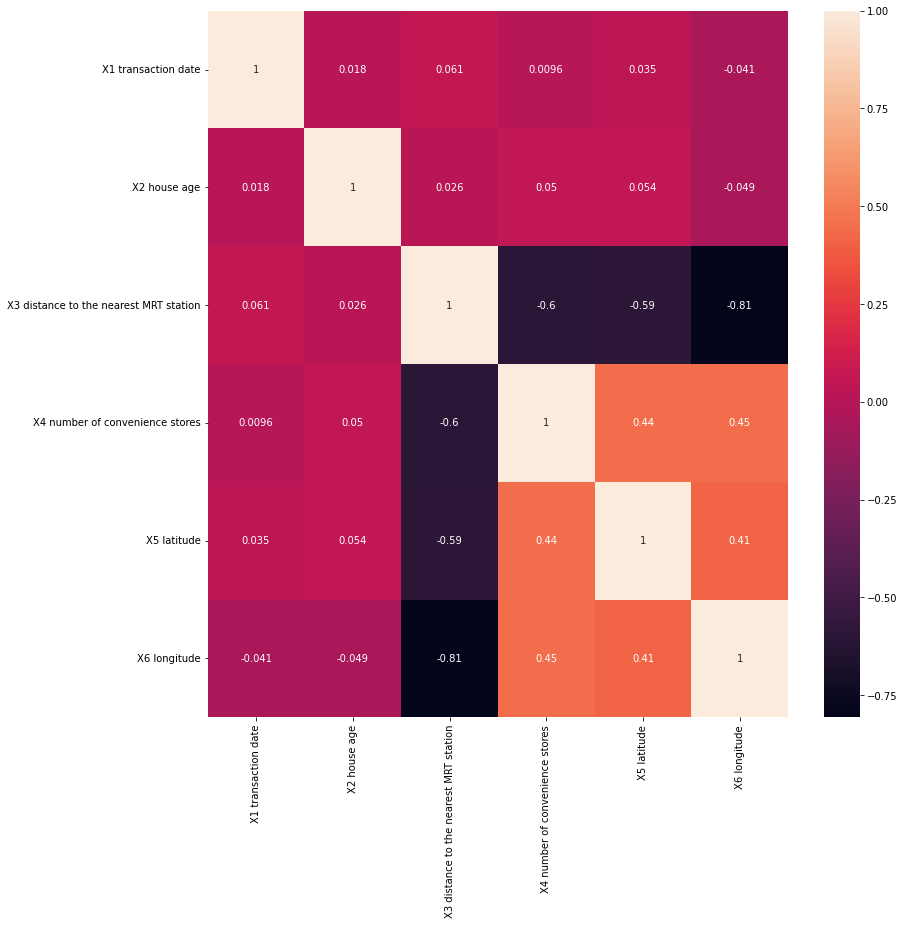

In [7]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(X.corr(method='pearson'), annot=True)

### Удаление скоррелированных признаков
При этом учитываются абсолютные значения парных корреляций. Если две переменные имеют высокую корреляцию, то функция рассматривает среднюю абсолютную корреляцию каждой переменной и удаляет переменную с наибольшей средней абсолютной корреляцией.

### Linear regression (Линейная регрессия)
Линейная регрессия представляет собой модель вида 
$$
\vec{y} = W{\cdot}\vec{x} + \vec{b}
$$


/tmp/ipykernel_21068/1545723011.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


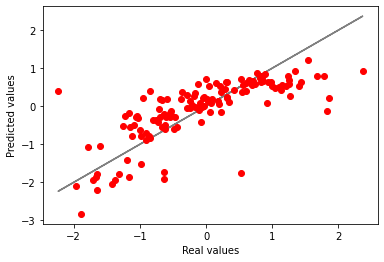

,metrics
MAE,0.448039
MSE,0.387059
RMSE,0.622141


In [8]:
# LinearRegression
current_model = linear_model.LinearRegression()
current_model.fit(X_train, y_train)
y_pred =  current_model.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

Метод линейно регрессии приближает наборы данных прямыми, плоскостями и гиперплоскостями. 
Складывается впечатление, что этот подход ограничивается лишь строго линейными отношениями между переменными, но ослабление этого требования также возможно.

### Конструирование признаков (Feature Engineering)

Одним из приемов, позволяющих адаптировать линейную регрессию к нелинейным связям между переменными, является преобразование данных в соответствии с некоторым *набором функций*.

In [9]:
from sklearn.pipeline import make_pipeline

#### Полиномиальные функции (Polynomial basis features)
Исходные признаки
$$
\{ x, y, z\}
$$

Целевые признаки
$$
\{ x, y, z, x^2, y^2, z^2, xy, xz, yz, ... \}
$$

Какой вид имеют признаки следующего порядка?

<AxesSubplot:>

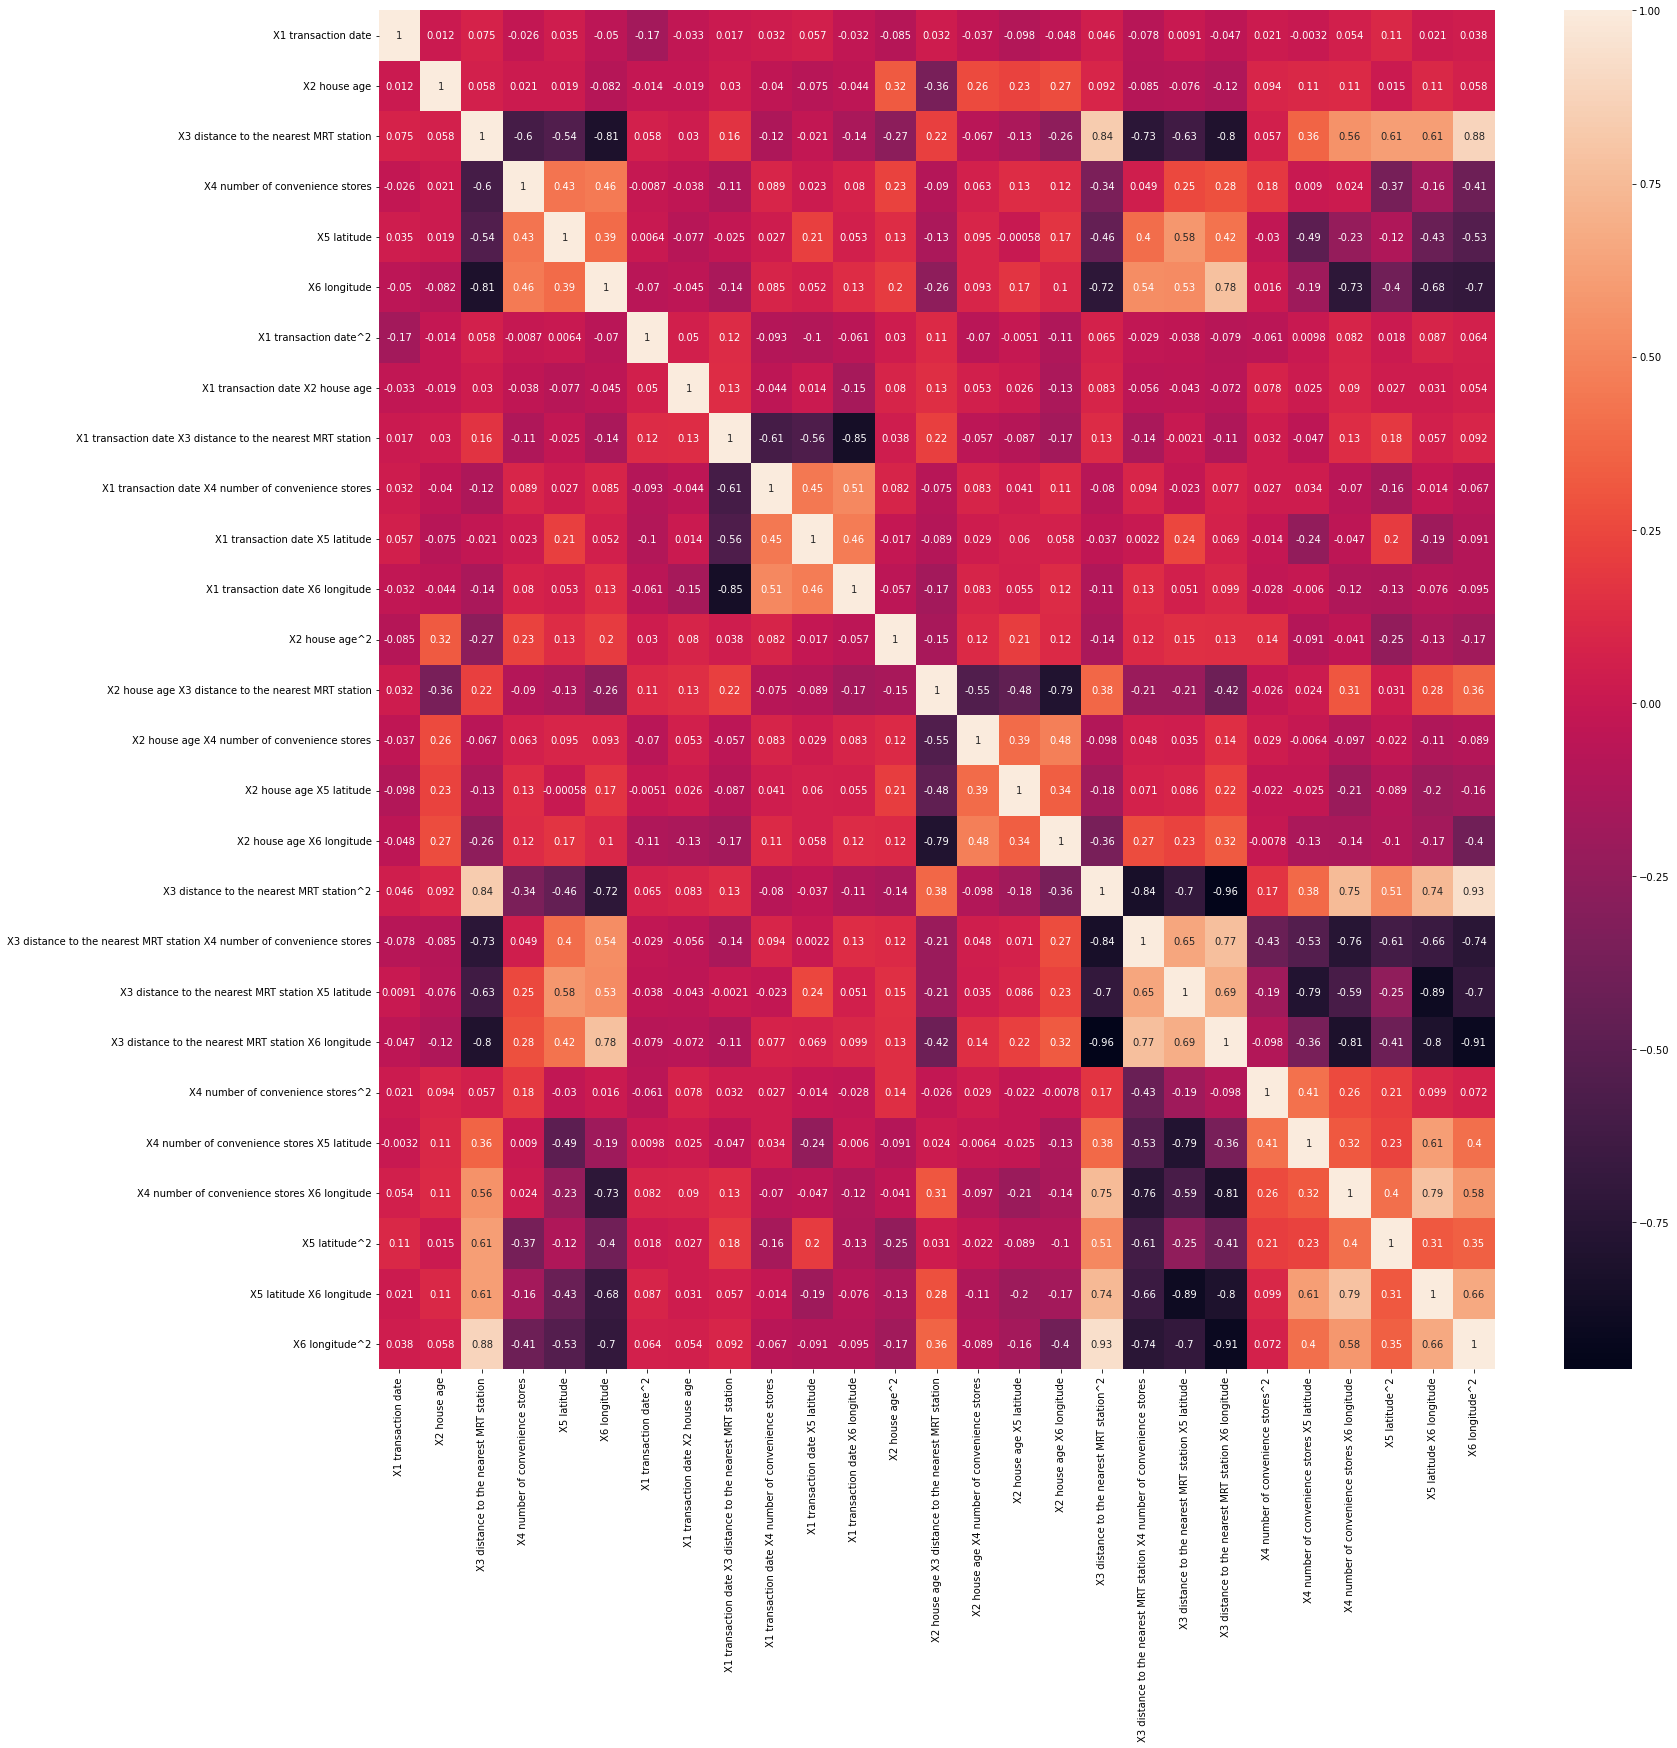

In [10]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2, include_bias=False)
X_train_transformed = transform.fit_transform(X_train)

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(X_train_transformed.corr(), annot=True, fmt='.2g')

/tmp/ipykernel_21068/3145433483.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


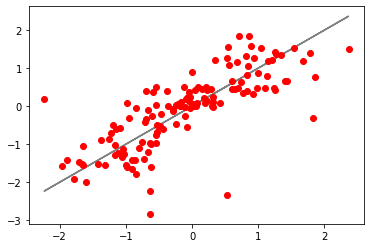

,metrics
MAE,0.457070
MSE,0.415983
RMSE,0.644967


In [11]:
current_model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
current_model.fit(X_train, y_train)
y_pred =  current_model.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

#### Пользовательские функции (Custom features)


Исходные признаки
$$
\{ x, y, z\}
$$

Целевые признаки
$$
\{ x, y, z, \sqrt{xy}, \sqrt{xz}, \sqrt{yz}, ... \}
$$

Какой вид имеют признаки следующего порядка?

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

RP_REGRESSION_TERMS_P1 = np.array([
    [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]
])
RP_REGRESSION_TERMS_P2 = np.concatenate((RP_REGRESSION_TERMS_P1,
np.array([
    [1/2, 1/2,   0,   0,   0,   0], [1/2,   0, 1/2,   0,   0,   0], [1/2,   0, 0, 1/2,   0,   0], [1/2, 0  , 0, 0, 1/2, 0], [1/2, 0, 0, 0, 0, 1/2],
    [  0, 1/2, 1/2,   0,   0,   0], [  0, 1/2,   0, 1/2,   0,   0], [0  , 1/2, 0,   0, 1/2,   0], [0  , 1/2, 0, 0, 0, 1/2],
    [  0,   0, 1/2, 1/2,   0,   0], [  0,   0, 1/2,   0, 1/2,   0], [0  ,   0, 1/2,   0, 0, 1/2],
    [  0,   0,   0, 1/2, 1/2,   0], [  0,   0,   0, 1/2,   0, 1/2],
    [  0,   0,   0,   0, 1/2, 1/2]
])))


RP_REGRESSION_TERMS = np.array([RP_REGRESSION_TERMS_P1, RP_REGRESSION_TERMS_P2], dtype=object)

class RootPolynomialFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, degree):
        self.degree_ = degree
        self.powers_ = RP_REGRESSION_TERMS[degree-1]
        self.is_fitted_ = False
        if degree > 2: self.degree_ = 2
        if degree < 0: raise ValueError('degree must not be less than zero')
    
    def fit(self, X, y = None):
        self.n_output_features_ = 8
        self.terms_ = RP_REGRESSION_TERMS[0]
        if self.degree_ == 2: 
            self.n_output_features_ = 28
            self.terms_ = RP_REGRESSION_TERMS[1]
               
        self.n_samples_, self.n_input_features_ = X.shape
        self.is_fitted_ = True

        return self

    def transform(self, X, y=None):
        if not self.is_fitted_:
            raise ValueError('Not fitted yet')
        features = []
        for term in self.terms_:
            features.append(np.prod(np.power(X, term), axis = 1))
        return np.array(features).T

    def fit_transform(self, X, y=None):
        self = self.fit(X, y)
        return self.transform(X, y)

<AxesSubplot:>

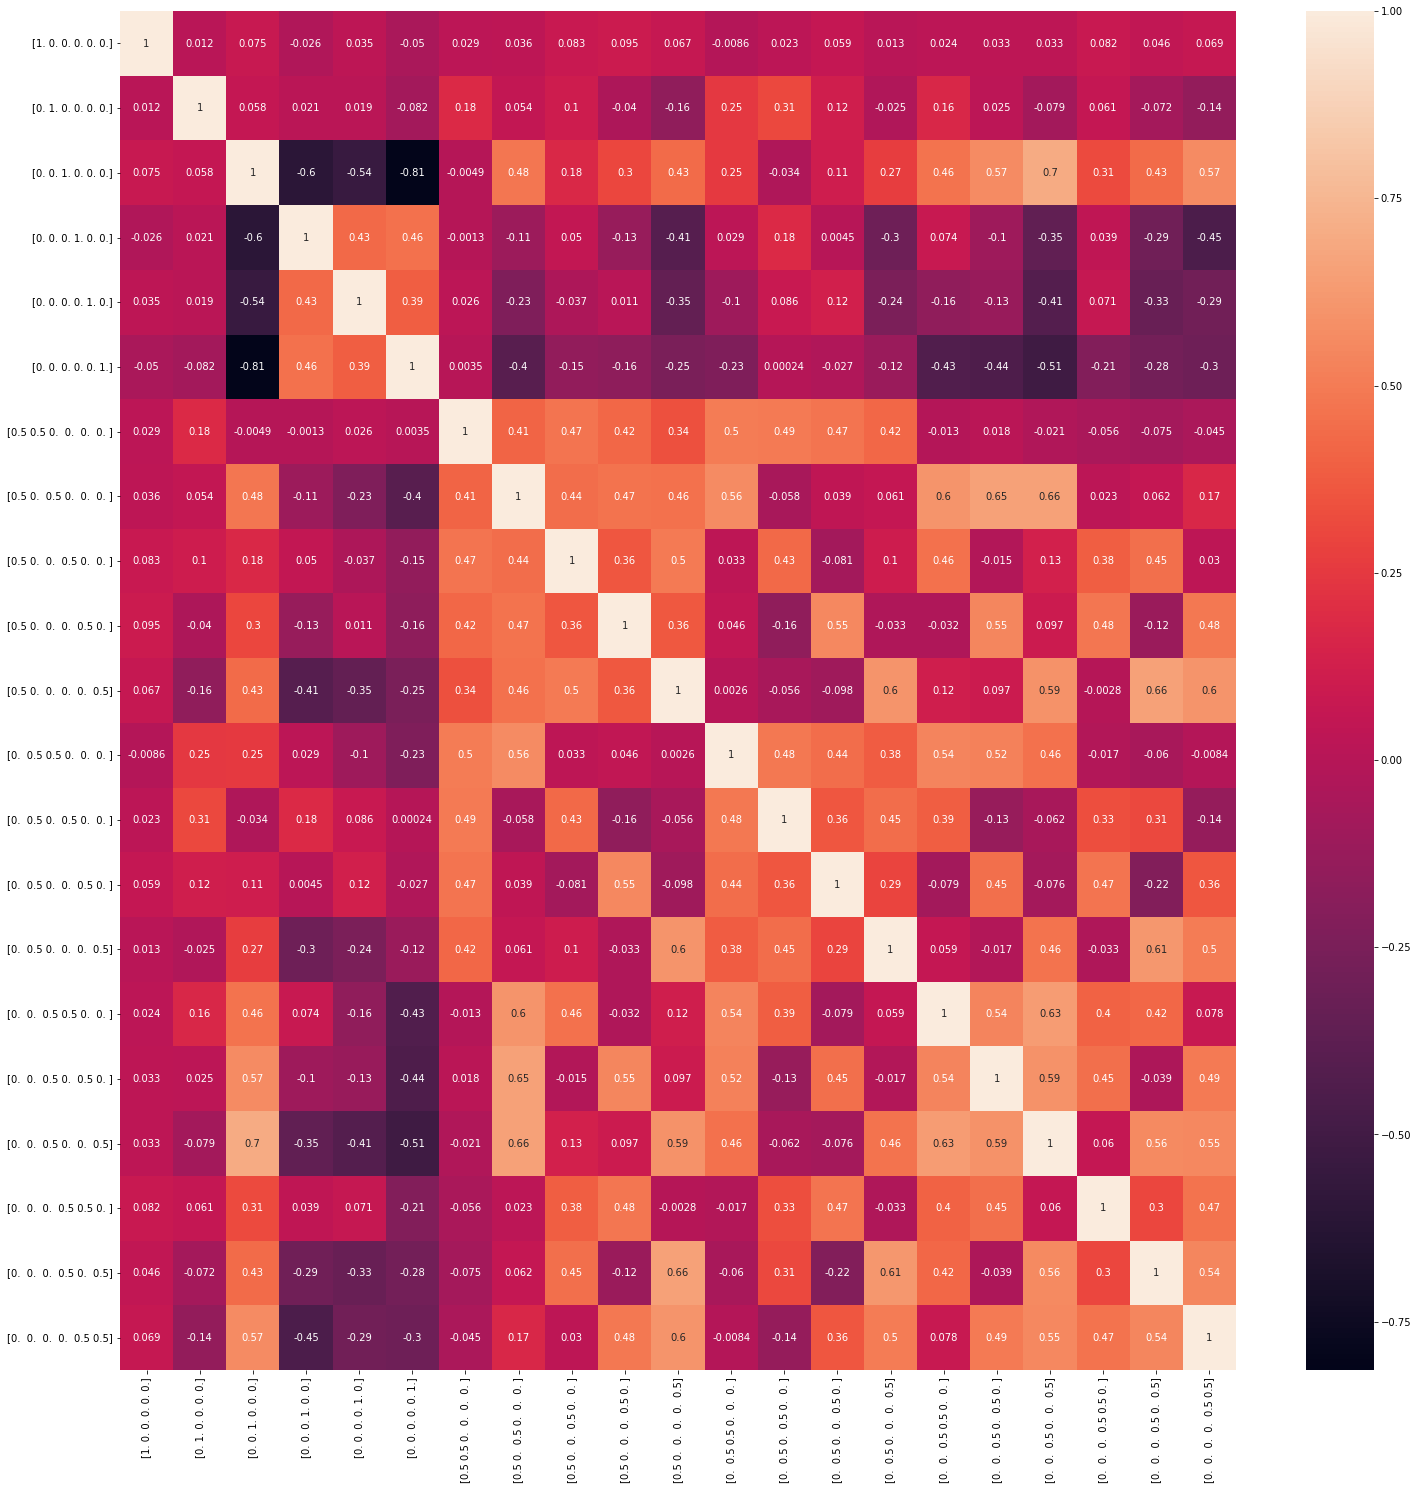

In [13]:
transform = RootPolynomialFeatures(2)

X_train_transformed = transform.fit_transform(X_train)
X_columns = list(map(str, transform.powers_))

X_train_transformed = pd.DataFrame(data=X_train_transformed, columns=X_columns)

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(X_train_transformed.corr(method='pearson'), annot=True, fmt='.2g')

/tmp/ipykernel_21068/303925670.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


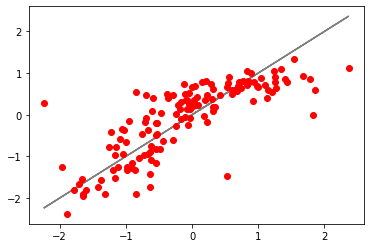

,metrics
MAE,0.421313
MSE,0.327681
RMSE,0.572435


In [14]:
current_model = make_pipeline(RootPolynomialFeatures(2),linear_model.LinearRegression())

current_model.fit(X_train, y_train)
y_pred =  current_model.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

### Регуляризация

Применение разнообразных функций в нашей линейной модели делает ее намного более гибкой, но также и быстро приводит к переобучению.

### Ridge regression (Гребневая регрессия)

Вероятно, самый часто встречающийся вид регуляризации — гребневая регрессия (ridge regression), или $L_2$ -регуляризация ($L_2$ -regularization), также иногда называемая регуляризацией Тихонова. Она заключается в наложении штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели.

[1.00000000e+10 4.52035366e+09 2.04335972e+09 9.23670857e+08
 4.17531894e+08 1.88739182e+08 8.53167852e+07 3.85662042e+07
 1.74332882e+07 7.88046282e+06 3.56224789e+06 1.61026203e+06
 7.27895384e+05 3.29034456e+05 1.48735211e+05 6.72335754e+04
 3.03919538e+04 1.37382380e+04 6.21016942e+03 2.80721620e+03
 1.26896100e+03 5.73615251e+02 2.59294380e+02 1.17210230e+02
 5.29831691e+01 2.39502662e+01 1.08263673e+01 4.89390092e+00
 2.21221629e+00 1.00000000e+00]


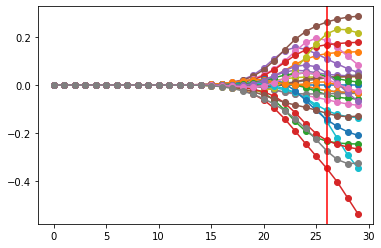

/tmp/ipykernel_21068/2748945927.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


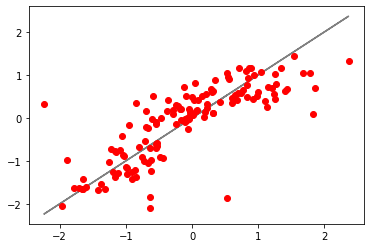

,metrics
MAE,0.401380
MSE,0.319930
RMSE,0.565623


In [15]:
# Ridge regression
n_alpha = 30
alpha_s = np.logspace(10, 0, n_alpha)

print(alpha_s)

#coefs = map(lambda a: make_pipeline(RootPolynomialFeatures(2), linear_model.Ridge(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = map(lambda a: make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Ridge regression with cross validation
current_model = make_pipeline(PolynomialFeatures(2), linear_model.RidgeCV(alpha_s))
#current_model = make_pipeline(RootPolynomialFeatures(2), linear_model.RidgeCV(alpha_s))

b = current_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == current_model[1].alpha_), c="r")
#plt.legend(X_train.columns)
#pml.savefig("prostate_data.pdf")
plt.show()

y_pred = b.predict(X_test)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

### Lasso regression (Лассо регрессия)

Следующий тип регуляризации — так называемая лассо-регуляризация, включающая штраф на сумму абсолютных значений ($L_1$ -норма) коэффициентов регрессии

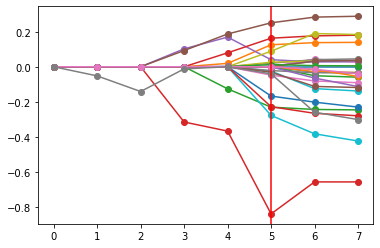

,metrics
MAE,0.394562
MSE,0.305421
RMSE,0.552649


In [16]:
# Lasso regression
alpha_s = [ 1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001, 0.00001 ]

coefs = map(lambda a: make_pipeline(PolynomialFeatures(2), linear_model.Lasso(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
#coefs = map(lambda a: make_pipeline(RootPolynomialFeatures(2), linear_model.Lasso(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))
# Lasso regression with cross validation
current_model = make_pipeline(PolynomialFeatures(2), linear_model.LassoCV(alphas=alpha_s))
#current_model = make_pipeline(RootPolynomialFeatures(2), linear_model.LassoCV(alphas=alpha_s))
b = current_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == current_model[1].alpha_), c="r")
#plt.legend(X_train.columns)
plt.show()

y_pred = b.predict(X_test)

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

### ElasticNet = Ridge Regression + Lasso Regression

/home/sergey/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/sergey/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/sergey/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.194e+01, tolerance: 2.932e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.

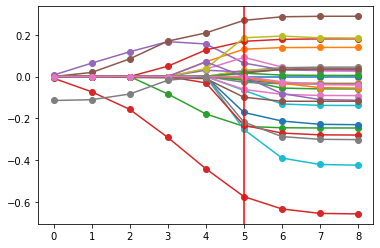

,metrics
MAE,0.400409
MSE,0.314308
RMSE,0.560632


In [17]:
# ElasticNet
alpha_s = [ 1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001, 0e-5 ]
'''
coefs = map(lambda a: linear_model.ElasticNet(alpha=a).fit(X_train, y_train).coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Lasso regression with cross validation
best_model = linear_model.ElasticNetCV(alphas=alpha_s)
b = best_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == best_model.alpha_), c="r")
plt.legend(X_train.columns)
plt.show()

y_pred = b.predict(X_test)
mean_squared_error(y_test, y_pred)
'''
coefs = map(lambda a: make_pipeline(PolynomialFeatures(2), linear_model.ElasticNet(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
#coefs = map(lambda a: make_pipeline(RootPolynomialFeatures(2), linear_model.ElasticNet(alpha=a)).fit(X_train, y_train)[1].coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))
# Lasso regression with cross validation
current_model = make_pipeline(PolynomialFeatures(2), linear_model.ElasticNetCV(alphas=alpha_s))
#current_model = make_pipeline(RootPolynomialFeatures(2), linear_model.ElasticNetCV(alphas=alpha_s))
b = current_model.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == current_model[1].alpha_), c="r")
#plt.legend(X_train.columns)
plt.show()

y_pred = b.predict(X_test)

MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error (y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE ,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

Нарисуем гистограмму ошибок нашей модели. Согласно нашим предположениям 

$$y = {w_1}{x_1} + \dots + {w_N}{x_N} + w_0 + e, e \sim N(0,\sigma^2)$$
$$y \sim  N({w_1}{x_1} + \dots + {w_N}{x_N} + w_0, \sigma^2)$$

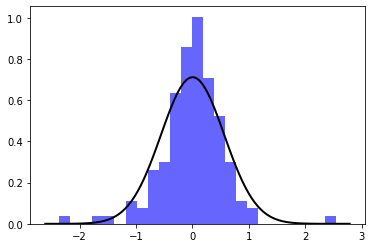

In [18]:
from scipy.stats import norm

fig, ax = plt.subplots()

y_err = y_pred - y_test
plt.hist(y_err, bins=25, density=True, alpha=0.6, color='b')

y_err_mu  = np.mean(y_err)
y_err_std = np.std (y_err)

y_min, y_max = plt.xlim()
y_tick_s = np.linspace(y_min, y_max, 100)
p = norm.pdf(y_tick_s, y_err_mu, y_err_std)
plt.plot(y_tick_s, p, 'k', linewidth=2)

plt.show()

### Обобщенные линейные модели

Мы рассмотрели применение линейных моделей при решении задачи регрессии. Как использовать линейные модели в задачах отличных от задач регрессии?



### Логистическая регрессия

Логистическая регрессия - это обобшение линейной модели в случае использования двух классов (позитивный класс и негативный класс). Например у нас имеется `неправильная` монета, вероятность $\mu_1$ выпадения орла 0.9, вероятность $\mu_2$ выпадения решки 0.1, $\mu_1 + \mu_2 = 1$.  Что будем предсказывать? Значение класса $[0, 1]$? Вероятность принадлежности к классу $\mu$?

$$Ber(y | \mu) = {\mu}^y(1-\mu)^{1-y} = exp[y{\log}(\mu) + (1-y){\log}(1-\mu)] = (1-\mu)\exp[y{\log}\Big(\dfrac{\mu}{1-\mu}\Big)]$$

$$log\Big(\frac{\mu}{1 - \mu}\Big) = {a_1}{x_1} + \dots + {a_N}{x_N} + a_0 \Rightarrow \mu = \dfrac{exp({a_1}{x_1} + \dots + {a_N}{x_N} + a_0)}{1 + exp({a_1}{x_1} + \dots + {a_N}{x_N} + a_0)}, y{\sim}Bern(\mu)$$

In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import seaborn as sns
import numpy   as np

import imageio
import sklearn
import time
import glob
import PIL
import os

from IPython import display

sns.set(style="ticks", color_codes=True)

#### Набор данных

Набор данных Iris dataset состоит из 170 наблюдений и 5 числовых признаков, которые выглядят следующим образом:

| Признак        | Описание           |
|----------------|--------------------|
| sepal_length   | Длина чашелистика  |
| sepal_width    | Ширина чашелистика |
| petal_length   | Длина лепестка     |
| petal_width    | Ширина лепестка    |
| species        | Вид ириса          |

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
from sklearn.linear_model import LogisticRegression
# Initially use 1 feature, 2 classes
X =  iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0'

log_reg = LogisticRegression(solver="lbfgs", penalty=None)
log_reg.fit(X, y)

/tmp/ipykernel_77188/1329367977.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0'


LogisticRegression(penalty=None)

/home/sergey/anaconda3/envs/work/lib/python3.8/site-packages/matplotlib/patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


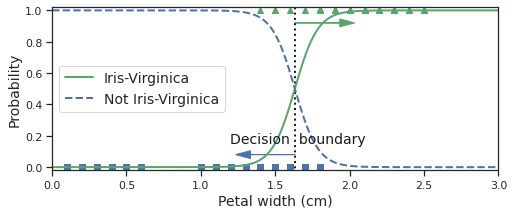

In [4]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary + 0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

/tmp/ipykernel_77188/4286578273.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


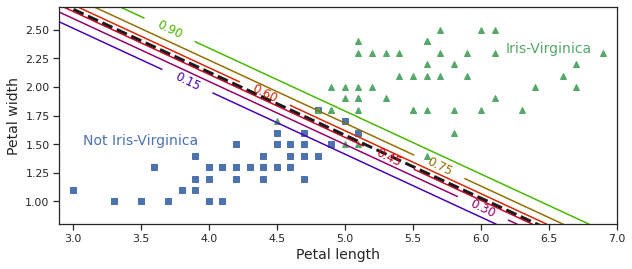

In [5]:
# Now use 2 features, 2 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression(solver="lbfgs", penalty=None)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica"    , fontsize=14, color="g", ha="center")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

#### L2-регуляризация, one-vs-rest (один против всех)

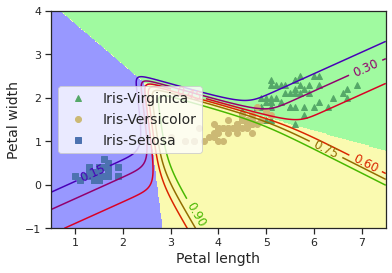

In [11]:
from matplotlib.colors import ListedColormap

# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", penalty='l2', C=1000, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(0.5, 7.5, 500).reshape(-1, 1),
    np.linspace( -1,   4, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure()
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Setosa")

custom_cmap = ListedColormap(["#9898ff", "#fafab0", "#a0faa0"])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

#### L1-регуляризация, one-vs-rest (один против всех)

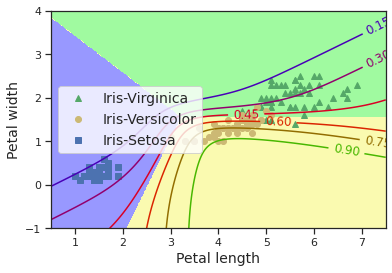

In [13]:
from matplotlib.colors import ListedColormap

# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="ovr", solver='liblinear', max_iter=1000, penalty='l1', C=1, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(0.5, 7.5, 500).reshape(-1, 1),
    np.linspace( -1,   4, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure()
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Setosa")

custom_cmap = ListedColormap(["#9898ff", "#fafab0", "#a0faa0"])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length"   , fontsize=14)
plt.ylabel("Petal width"    , fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

### Softmax регрессия

Мультиномиальная регрессия - это обобщение линейной модели в случае использования более двух классов. Например у нас `неправильный` кубик, где вероятности выпадения каждой из граней $\mu_1, \cdots, \mu_6$, $\mu_1 + \cdots + \mu_6 = 1$

$$Multinomial(y | \vec{\mu}) = \Biggl\{ y_k = I(y=k) = \begin{cases} 1 & y = k \\ 0 & y \neq k \end{cases} \Biggl\} = \prod_{k=1}^{K}\mu_{k}^{y_k} = \exp \Big[ \sum_{k=1}^{K} y_k \log \mu_k \Big] = \exp \Big[ \sum_{k=1}^{K-1} y_k{\log}\mu_k + (1 - \sum_{k=1}^{K-1}y_k) \log(1 - \sum_{k=1}^{K-1}\mu_k) \Big] = \exp \Big[ \sum_{k=1}^{K-1} \log \Big( \dfrac{\mu_k}{\mu_K}\Big) + \log\mu_K \Big], \text{где  } \mu_K = 1 - \sum_{k=1}^{K-1}\mu_k$$

Введем обозначение $$\theta = [\log\frac{\mu_1}{\mu_K},\cdots,\log\frac{\mu_{K-1}}{\mu_K}]$$ , тогда $$\mu_k = \dfrac{\exp({\theta}_k)}{1 + \sum_{k=1}^{K-1}exp({\theta}_k)}, \mu_K = \dfrac{1}{1 + \sum_{k=1}^{K-1}exp({\theta}_k)}$$ положим $$\theta_K = 0$$ тогда

$$\mu_k = \dfrac{\exp({\theta}_k)}{\sum_{k=1}^{K}\exp({\theta}_k)}, y{\sim}Multinomial(\mu)$$

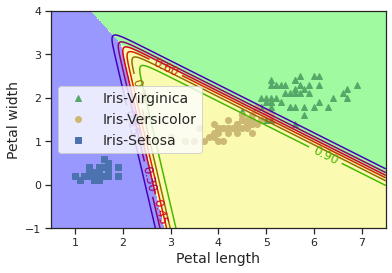

In [15]:
# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1000, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(0.5, 7.5, 500).reshape(-1, 1),
    np.linspace(-1, 4, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure()
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#9898ff", "#fafab0", "#a0faa0"])
# custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']
# custom_cmap = ListedColormap(sns.color_palette())

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
# plt.axis([0, 7, 0, 3.5])
# save_fig("iris-logreg-2d-3class.pdf")
plt.show()

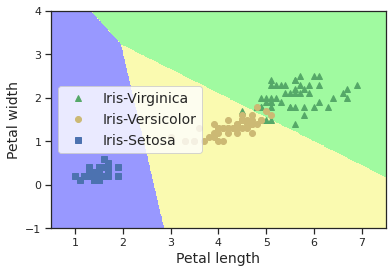

In [16]:
plt.figure()
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length"   , fontsize=14)
plt.ylabel("Petal width"    , fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

In [17]:
# Get predictive distribution for a single example
X = [[2.5, 3.0]]  # (1,2) array
y_probs = softmax_reg.predict_proba(X)
print(np.round(y_probs, 2))  # [[0.01 0.4  0.6 ]]

[[0.01 0.4  0.6 ]]


In [18]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=100, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=100, multi_class='multinomial', random_state=42)

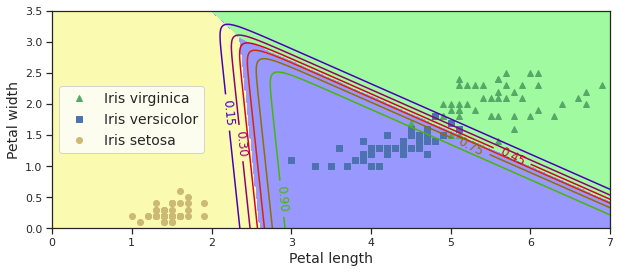

In [36]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

x0, x1 = np.meshgrid(
        np.linspace(0,   8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba   = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict      (X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

iris = datasets.load_iris()
X = iris.data # use all data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty=None)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
errs = y_pred != y_test
nerrs = np.sum(errs)
print("Made {} errors out of {}, on instances {}".format(nerrs, len(y_pred), np.where(errs)))

err_rate_test = zero_one_loss(y_test, y_pred)

assert np.isclose(err_rate_test, nerrs / len(y_pred))

err_rate_train = zero_one_loss(y_train, logreg.predict(X_train))
print("Error rates on train {:0.3f} and test {:0.3f}".format(err_rate_train, err_rate_test))

Made 1 errors out of 50, on instances (array([46]),)
Error rates on train 0.000 and test 0.020
